# Classifying Bird Bones By Size
###### Bird bones will vary in length and diameter sometimes in accordance with their environmental niches. This data set contains bone dimensions of six groups of birds, each making up a different kind of ecological grouping: Swimming Birds(SW), Wading Birds(W), Terrestrial Birds(T), Raptors(R), Scansorial Birds(P), and Singing Birds(SO).
##### This project is see whether or not we can use PCA along with a decision tree or logistic regression to classify these groups.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

## Import Data

In [2]:
#Read in data
bones = pd.read_csv("bird.csv")
bones.info()
bones.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,209.500000,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,121.387808,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,0.000000,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,104.750000,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,209.500000,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,314.250000,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,419.000000,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


In [3]:
#Check for null values
bones.isnull().sum()

id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64

In [4]:
#Remove unneccessary columns of the DataFrame
bones.drop(['id'], axis=1,inplace=True)

#Remove null values
bones.dropna(inplace=True)
bones.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,64.874867,4.381235,69.197409,3.606538,36.822446,3.221768,64.615642,3.182324,39.309806,2.944891
std,54.056078,2.861460,58.929490,2.190150,19.899356,2.021169,37.977929,2.084124,23.272704,2.194744
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.360000,2.200000,28.160000,1.870000,21.350000,1.720000,36.350000,1.560000,23.050000,1.430000
50%,44.180000,3.500000,43.710000,2.960000,31.090000,2.520000,51.880000,2.490000,31.740000,2.240000
75%,90.490000,5.820000,97.520000,4.770000,47.090000,4.110000,82.870000,4.250000,50.440000,3.520000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


## EDA

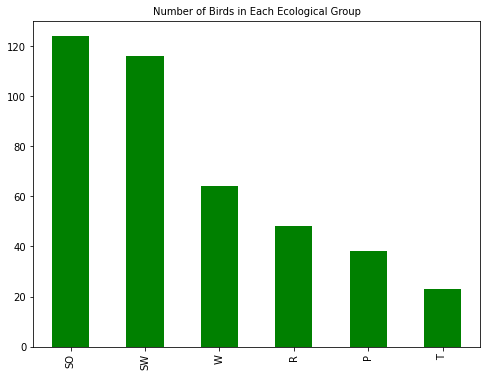

In [5]:
#Plot number in each type of ecological group
size_of_each_group = bones.groupby("type").size().sort_values(ascending=False)
ax = size_of_each_group.plot(kind="bar", color="green",figsize=(8, 6))

ax.set_title("Number of Birds in Each Ecological Group", fontsize=10)
ax.set_xlabel("");

<Figure size 504x360 with 0 Axes>

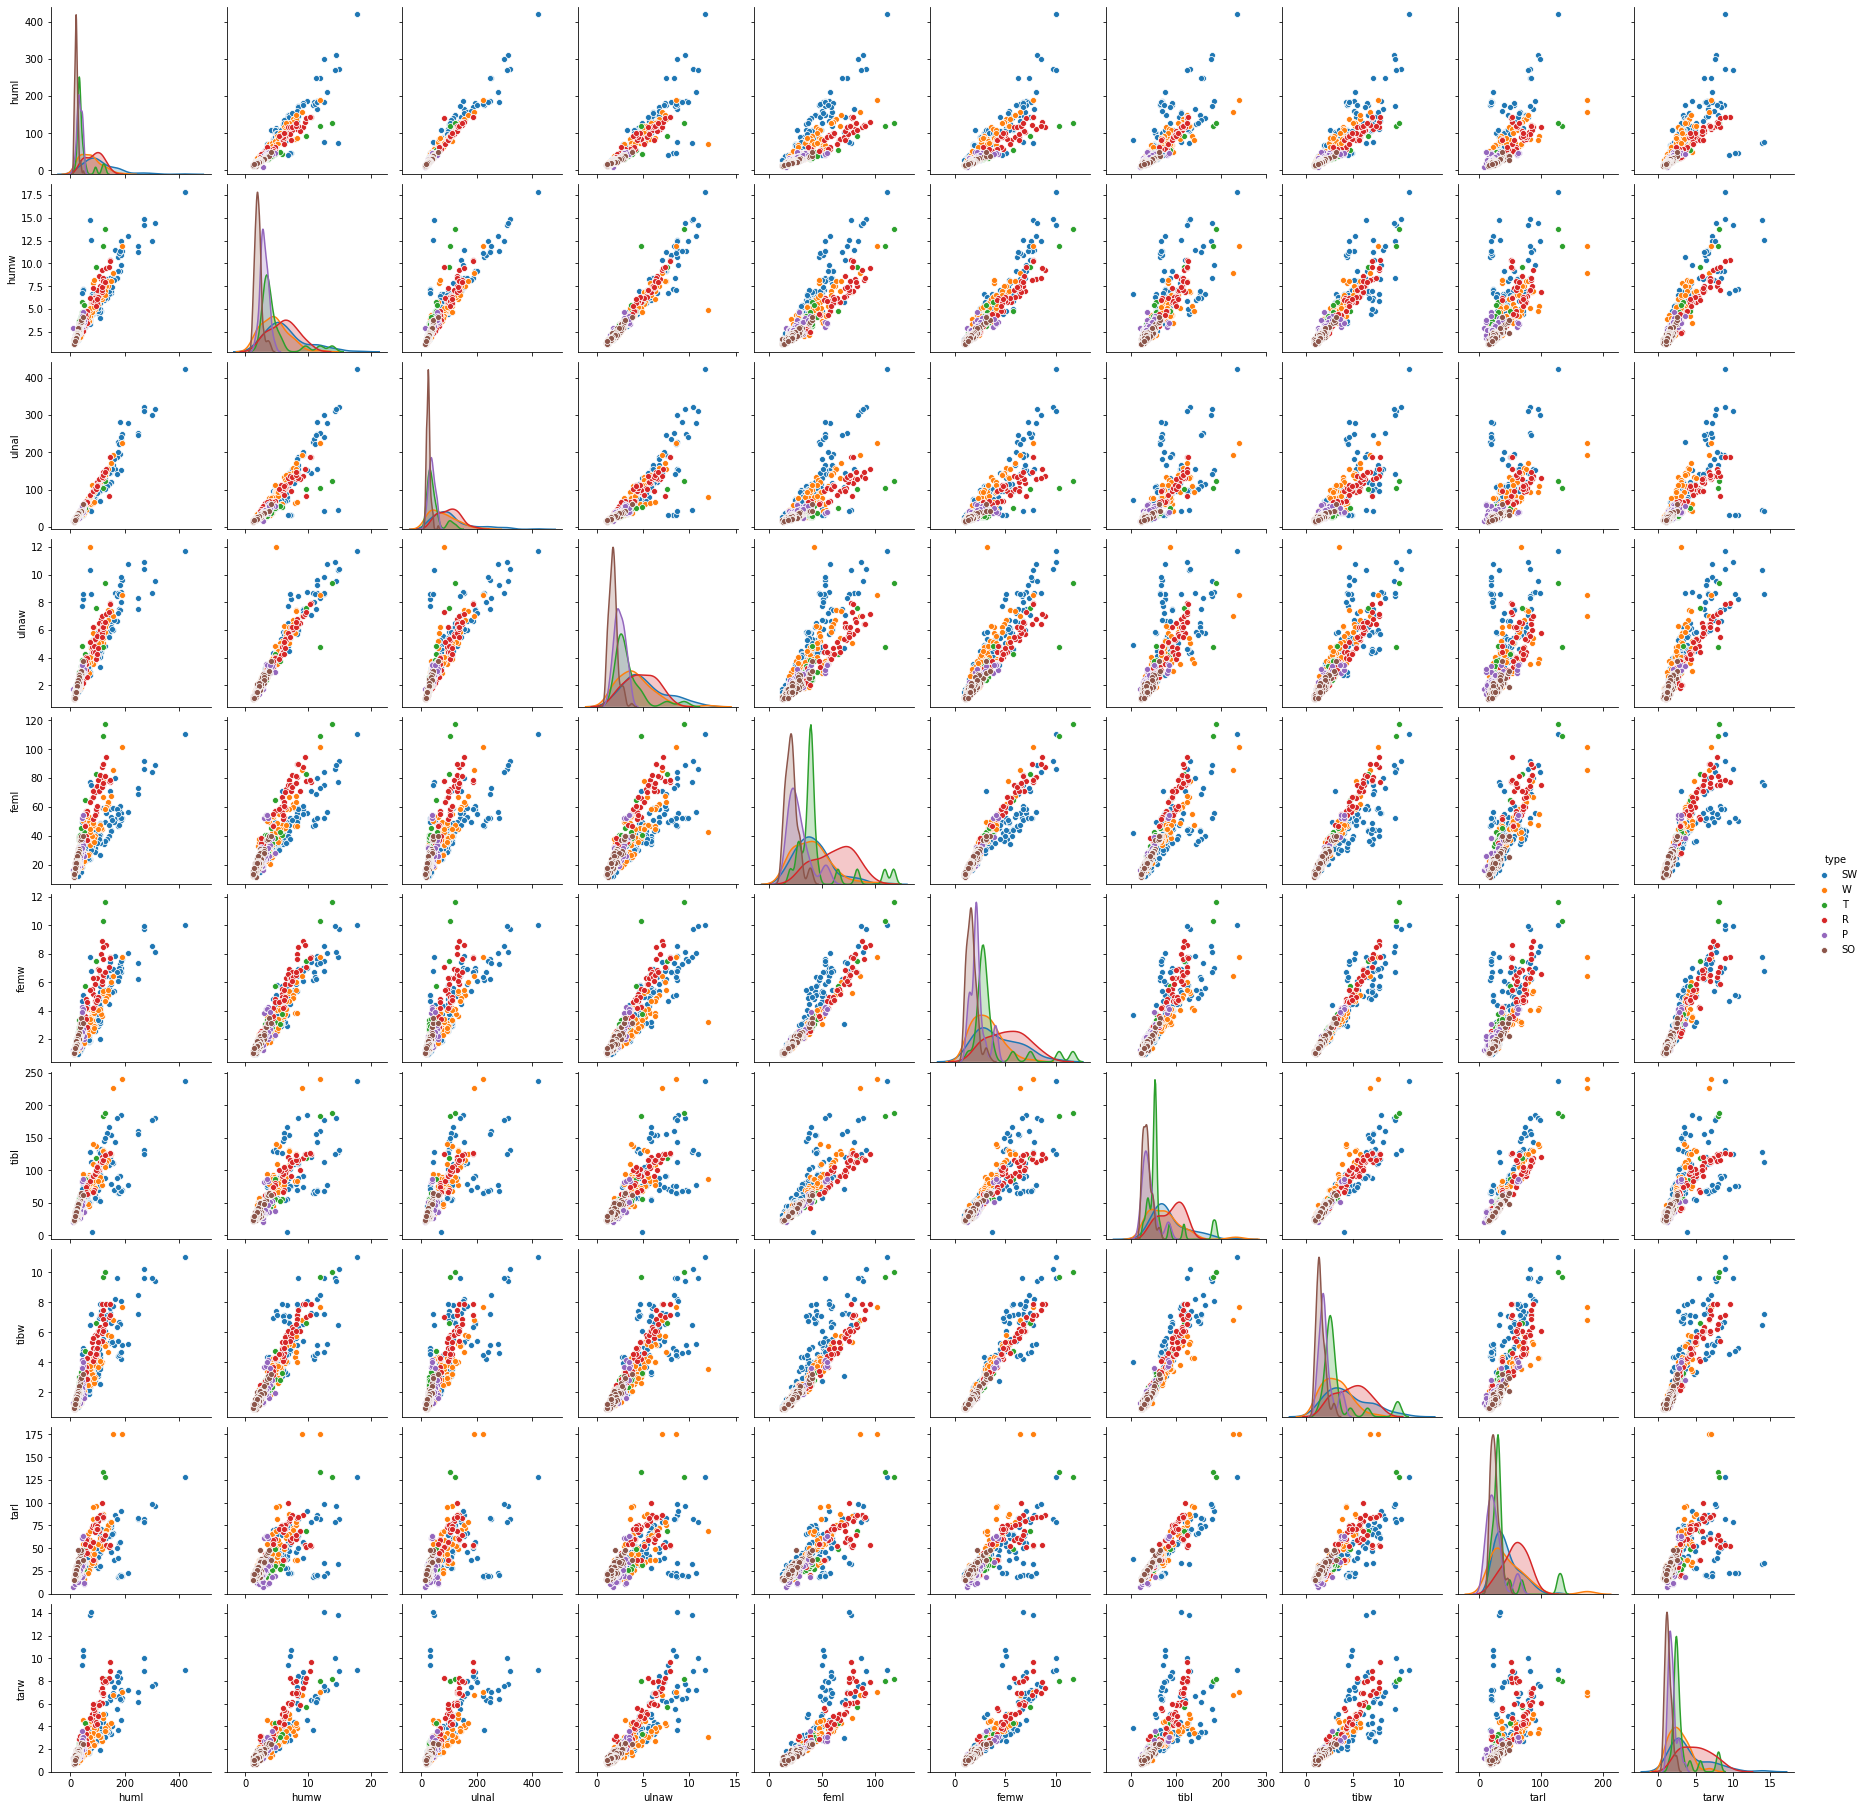

In [6]:
#Plot features as pairs
plt.figure(figsize=(7,5))
sns.pairplot(bones, vars= bones.columns[:-1], hue='type');

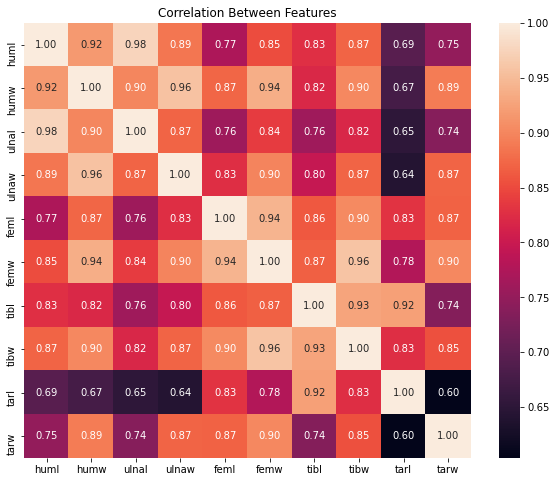

In [7]:
#Plot correlation matrix between features
f,ax= plt.subplots(figsize=(10,8))
ax=sns.heatmap(bones.corr(),annot=True,fmt = ".2f")
ax.set_title('Correlation Between Features');

###### We can see by both of the graphs above that most features are correlated with each other. The lowest correlation value is 0.6!

### Normalizing

In [8]:
# Define our features 
features = bones.drop(['type'], axis=1)

# Define our labels
labels = bones['type']

### Scaling

In [9]:
scaler= StandardScaler()
scaled_train_features=scaler.fit_transform(features)

### Look at Elbow and Silhouette Plots For N-Components

In [10]:
km_scores= []
km_silhouette = []

for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=0).fit(scaled_train_features)
    preds = km.predict(scaled_train_features)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(scaled_train_features)))
    km_scores.append(-km.score(scaled_train_features))
    
    silhouette = silhouette_score(scaled_train_features,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Score for number of cluster(s) 2: -1612.9653242837608
Silhouette score for number of cluster(s) 2: 0.5923375890516658
Score for number of cluster(s) 3: -1093.7836872795142
Silhouette score for number of cluster(s) 3: 0.49986437254440064
Score for number of cluster(s) 4: -868.4619526207867
Silhouette score for number of cluster(s) 4: 0.48742748377261763
Score for number of cluster(s) 5: -736.3531759034227
Silhouette score for number of cluster(s) 5: 0.4811809459000108
Score for number of cluster(s) 6: -641.7062441946061
Silhouette score for number of cluster(s) 6: 0.381570265902011
Score for number of cluster(s) 7: -568.3684505591185
Silhouette score for number of cluster(s) 7: 0.3774381564890861
Score for number of cluster(s) 8: -502.27082853441095
Silhouette score for number of cluster(s) 8: 0.38715658462684605
Score for number of cluster(s) 9: -439.01702306102476
Silhouette score for number of cluster(s) 9: 0.3925020116189255


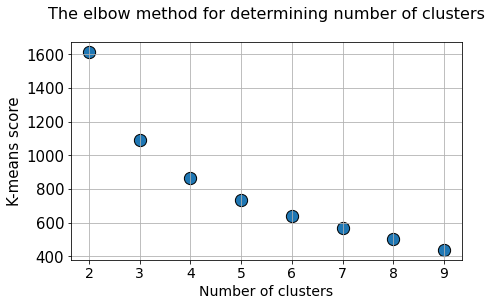

In [11]:
#Plot elbow method
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

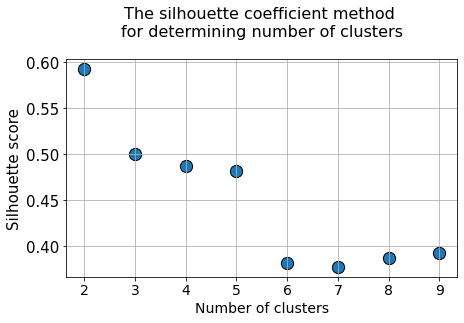

In [12]:
#Plot silhouette method
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,10)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,10)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

###### Both elbow and silhouette methods find 2 to be the optimum number

### PCA

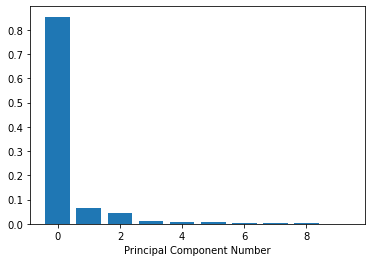

In [13]:
# Get explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(10), exp_variance)
ax.set_xlabel('Principal Component Number');

### Cumulative Explained Variance Plot

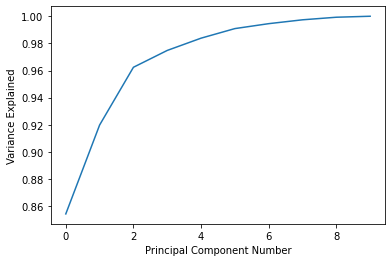

In [14]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot cumulative explained variance
fig, ax = plt.subplots()
ax.plot(range(10), cum_exp_variance)
ax.set_xlabel('Principal Component Number')
ax.set_ylabel('Variance Explained')
n_components = 2

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=68)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [15]:
print('Number of Principal Components needed to explain total variance:',
      pca.components_.shape[0] )
print('Cumulative explained variance of first two components:',
      pca.explained_variance_ratio_[:2].cumsum()[1])
print('Individual explained variance of first three components:',
      pca.explained_variance_ratio_[:3])

Number of Principal Components needed to explain total variance: 2
Cumulative explained variance of first two components: 0.9198067338356912
Individual explained variance of first three components: [0.85427849 0.06552825]


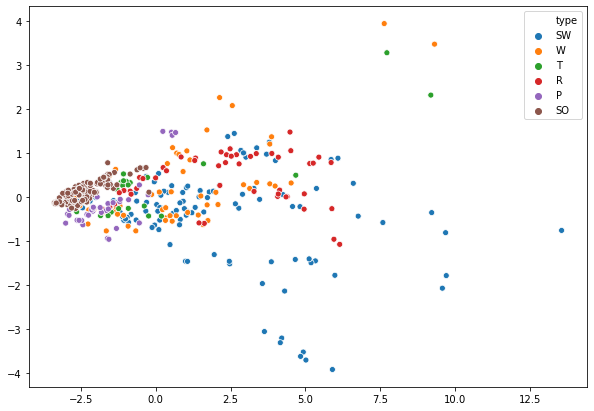

In [16]:
plt.figure(figsize=(10,7));
sns.scatterplot(pca_projection[:,0],pca_projection[:,1],hue=bones['type']);

###### You can see that the data is not well separated and thus hard to cluster.

### Train a Decision Tree

In [17]:
# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=68)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=68)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

### Compare This to a Logistic Regression

In [18]:
# Train logistic regression and predict labels for test set
logreg = LogisticRegression(random_state=68)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Create classification report for both models

class_rep_tree = classification_report(test_labels, pred_labels_tree,zero_division=1)
class_rep_log = classification_report(test_labels, pred_labels_logit,zero_division=1)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

           P       0.44      0.36      0.40        11
           R       0.50      0.46      0.48        13
          SO       0.82      0.73      0.77        37
          SW       0.52      0.74      0.61        19
           T       0.00      0.00      0.00         4
           W       0.35      0.30      0.32        20

    accuracy                           0.55       104
   macro avg       0.44      0.43      0.43       104
weighted avg       0.56      0.55      0.55       104

Logistic Regression: 
               precision    recall  f1-score   support

           P       1.00      0.09      0.17        11
           R       0.00      0.00      0.00        13
          SO       0.77      0.92      0.84        37
          SW       0.34      0.89      0.49        19
           T       1.00      0.00      0.00         4
           W       0.43      0.15      0.22        20

    accuracy                         

### Using Cross-Validation to Evaluate Models

In [19]:
# Set up our K-fold cross-validation
kf = KFold(n_splits=20)

tree = DecisionTreeClassifier(random_state=68)
logreg = LogisticRegression(random_state=68)

# Train our models using KFold cv
tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score))

Decision Tree: 0.3682142857142857 Logistic Regression: 0.49738095238095237


##### It would appear that both decision tree and logistic regression are equally poor at modelling this data with PCA. This is not surprising given the low dimensionality of the data.